### Printing out the Branches in the data to see what's available.

In [1]:
import ROOT
f = ROOT.TFile.Open("/mnt/data/eos/run321/run321.root")
events = f.Get("events")
events.Print()

******************************************************************************
*Tree    :events    : events                                                 *
*Entries :   499539 : Total =      3826941537 bytes  File  Size = 1127398038 *
*        :          : Tree compression factor =   3.39                       *
******************************************************************************
*Br    0 :event_number : event_number/I                                      *
*Entries :   499539 : Total  Size=    2006266 bytes  File Size  =     705165 *
*Baskets :       77 : Basket Size=      51200 bytes  Compression=   2.84     *
*............................................................................*
*Br    1 :nhit      : nhit/I                                                 *
*Entries :   499539 : Total  Size=    2005618 bytes  File Size  =     744647 *
*Baskets :       77 : Basket Size=      51200 bytes  Compression=   2.69     *
*...................................................

### AmBe Analysis. ###
This block of code just prints out the data that's available in the root file.<br>
It looks like fitted_time and fitted_pulse_height are just 9999. So they might not be valid yet.<br>
The total_charge seems to be an event wide variable and there are multiple pulse_height in each event.<br>


In [2]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "321"

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
event_number = rdf.AsNumpy(columns=["event_number"])["event_number"]
total_charge = rdf.AsNumpy(columns=["total_charge"])["total_charge"]
deltat = rdf.AsNumpy(columns=["deltat"])["deltat"]
board = rdf.AsNumpy(columns=["board"])["board"]
channel = rdf.AsNumpy(columns=["channel"])["channel"]
charge = rdf.AsNumpy(columns=["charge"])["charge"]
trigger_time = rdf.AsNumpy(columns=["trigger_time"])["trigger_time"]
#fitted_time = rdf.AsNumpy(columns=["fitted_time"])["fitted_time"] # just 9999
time = rdf.AsNumpy(columns=["time"])["time"]
#fitted_pulse_height = rdf.AsNumpy(columns=["fitted_pulse_height"])["fitted_pulse_height"] #just 9999
pulse_height = rdf.AsNumpy(columns=["pulse_height"])["pulse_height"]

for iEvt in range(0,2): #range(0,len(event_number)):
    print("Event = ", iEvt, "nhit",nhit[iEvt],"total_charge", total_charge[iEvt],"deltat",
          deltat[iEvt],"len(pulse_height[iEvt])",len(pulse_height[iEvt]))
    for iPulse in range(0,len(trigger_time[iEvt])):
        print("trigger_time", trigger_time[iEvt][iPulse],"time", time[iEvt][iPulse],pulse_height[iEvt][iPulse])

Event =  0 nhit 200 total_charge 6151.037375710228 deltat 2182881.832 len(pulse_height[iEvt]) 200
trigger_time 272860229 time 84.59309857733831 -336.7032137784092
trigger_time 272860229 time 80.50732050021077 -515.9801136363635
trigger_time 272860229 time 82.13210194226092 -367.5315163352273
trigger_time 272860229 time 80.18705855547961 -472.0237038352273
trigger_time 272860229 time 83.273728474169 -517.8000710227273
trigger_time 272860229 time 84.34990159051013 -479.2813387784092
trigger_time 272860229 time 84.76044424830833 -490.88911576704544
trigger_time 272860229 time 81.94162298933671 -535.9441583806819
trigger_time 272860229 time 82.21825456623971 -475.64142400568187
trigger_time 272860229 time 83.76329891341027 -524.2032137784091
trigger_time 272860229 time 82.9697548651956 -497.7916370738635
trigger_time 272860229 time 85.72033148482771 -510.4092684659092
trigger_time 272860229 time 78.86222485440726 -531.9047407670454
trigger_time 271589143 time 81.39846412638046 -564.5530007

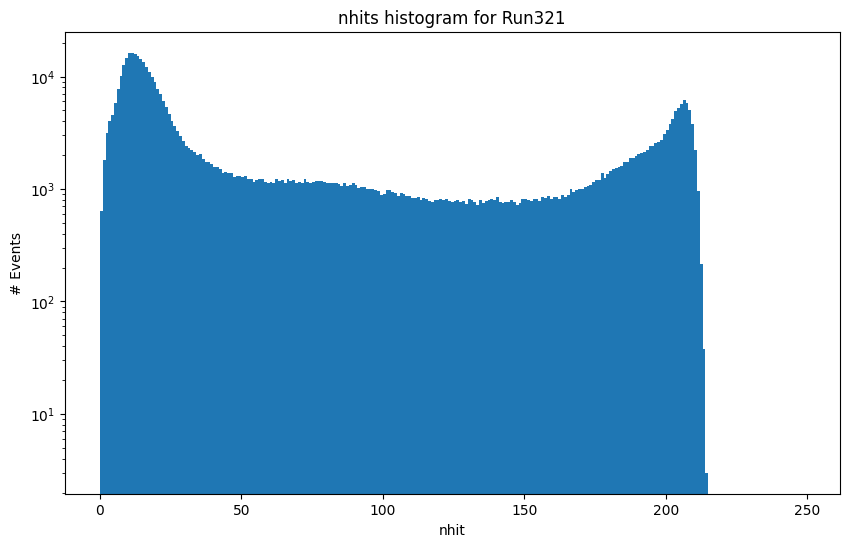

In [3]:
### Plot of nhits
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "321"

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]

plt.figure(figsize=(10,6))
plt.hist(nhit,bins=range(0,250))
plt.title("nhits histogram for Run"+run_number)
plt.xlabel("nhit")
plt.ylabel("# Events")
plt.yscale('log')
plt.show()

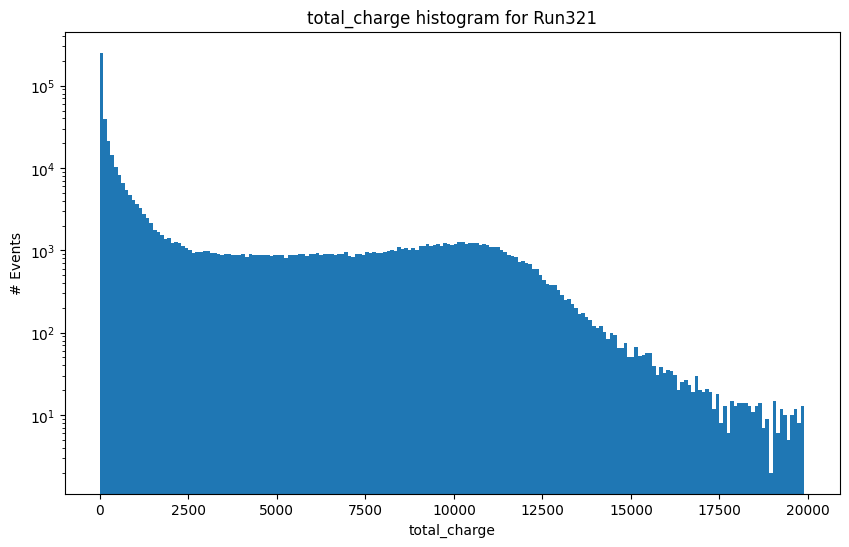

In [4]:
### Plot of total_charge
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "321"

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
total_charge = rdf.AsNumpy(columns=["total_charge"])["total_charge"]

plt.figure(figsize=(10,6))
plt.hist(total_charge,bins=range(0,20000,100))
plt.title("total_charge histogram for Run"+run_number)
plt.xlabel("total_charge")
plt.ylabel("# Events")
plt.yscale('log')
plt.show()

### Let's look at the correlation between charge and nhit.
I am going to make a histogram (fill then imshow) of total_charge versus nhit.<br>
nhit of 200 ~ 6000. So I am going to divide charge by 30.<br>

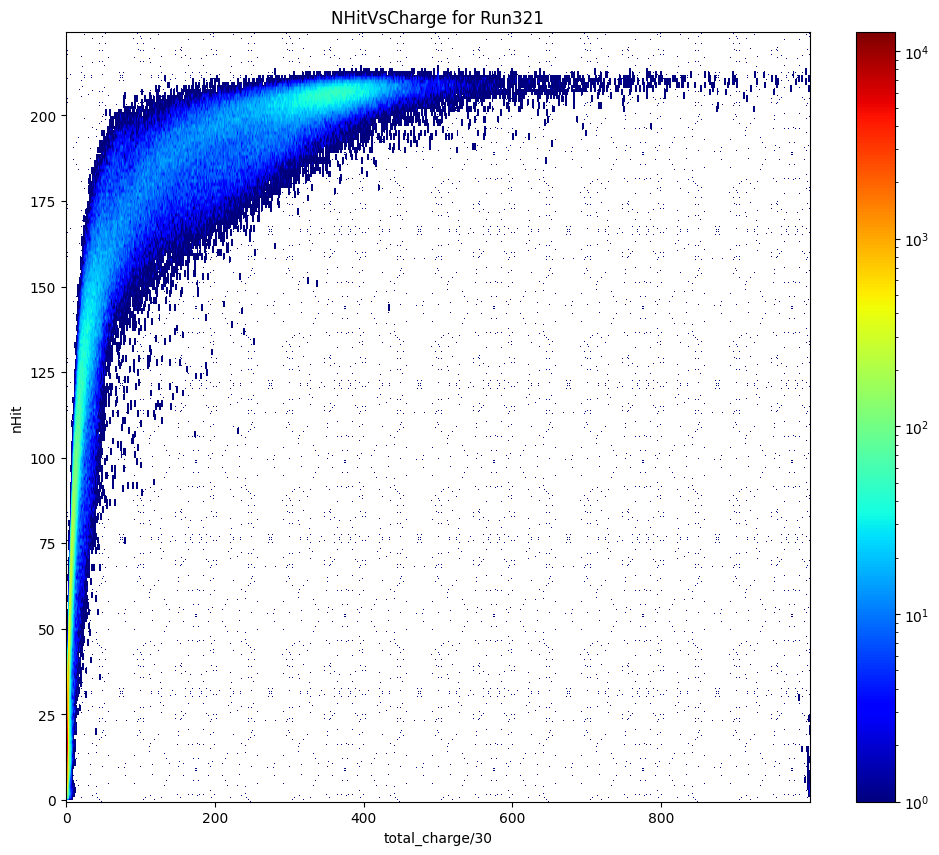

In [5]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "321"

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
total_charge = rdf.AsNumpy(columns=["total_charge"])["total_charge"]

TotalChargeVsNHit = np.zeros([225,1000],int)
for iEvt in range(0,len(nhit)):
    if(int(total_charge[iEvt]/30) < 1000):
        TotalChargeVsNHit[nhit[iEvt]][int(total_charge[iEvt]/30)] +=1
    else:
        TotalChargeVsNHit[nhit[iEvt]][499] +=1

plt.figure(figsize=(12,10))
plt.imshow(TotalChargeVsNHit,origin='lower',cmap='jet',norm=colors.LogNorm(), aspect="auto")
plt.title("NHitVsCharge for Run"+run_number)
plt.xlabel("total_charge/30")
plt.ylabel("nHit")
plt.colorbar()
plt.show()
    

### NHit vs Charge try two.
It looks like there's a non-linear part when nhit/charge gets too large<br>
Let's look at it zooming to nhit ~150 and charge ~ 50*30<br>

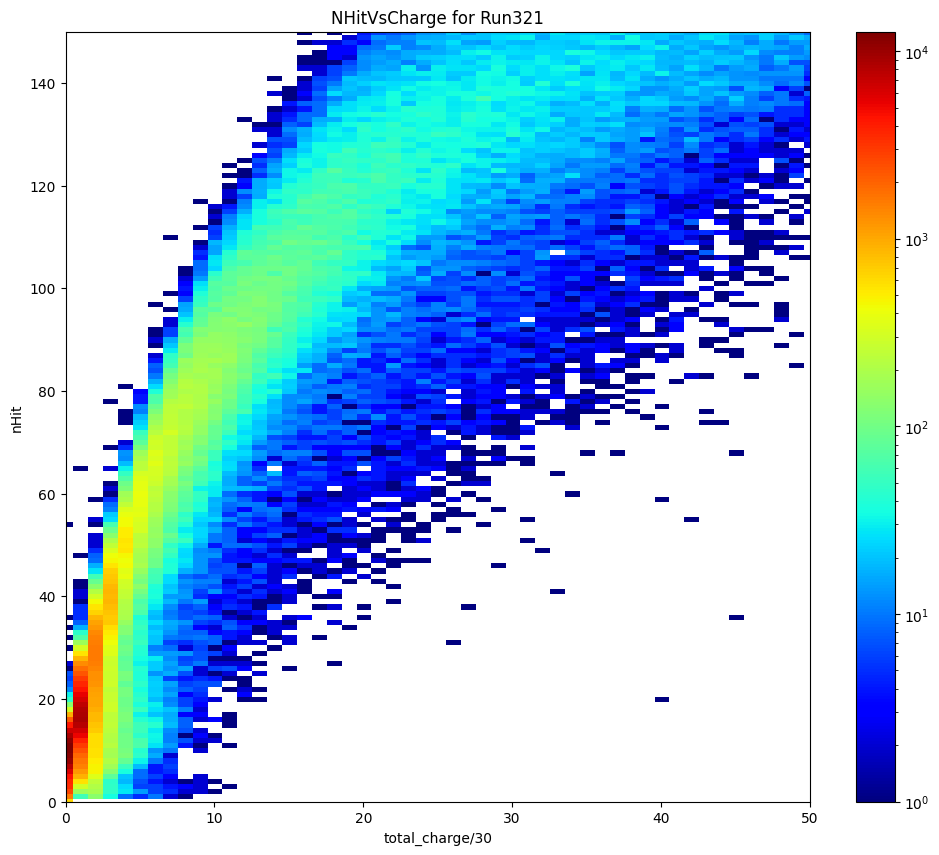

In [6]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "321"

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
total_charge = rdf.AsNumpy(columns=["total_charge"])["total_charge"]

TotalChargeVsNHit = np.zeros([225,1000],int)
for iEvt in range(0,len(nhit)):
    if(int(total_charge[iEvt]/30) < 1000):
        TotalChargeVsNHit[nhit[iEvt]][int(total_charge[iEvt]/30)] +=1
    else:
        TotalChargeVsNHit[nhit[iEvt]][499] +=1

plt.figure(figsize=(12,10))
plt.imshow(TotalChargeVsNHit,origin='lower',cmap='jet',norm=colors.LogNorm(), aspect="auto")
plt.title("NHitVsCharge for Run"+run_number)
plt.xlabel("total_charge/30")
plt.ylabel("nHit")
plt.xlim(0,50)
plt.ylim(0,150)
plt.colorbar()
plt.show()

### nhit vs charge try 3.
There seems to be more structure with small total charge and nhit.<br>
Let's zoom in even more and charge to charge/10 instead.<br>

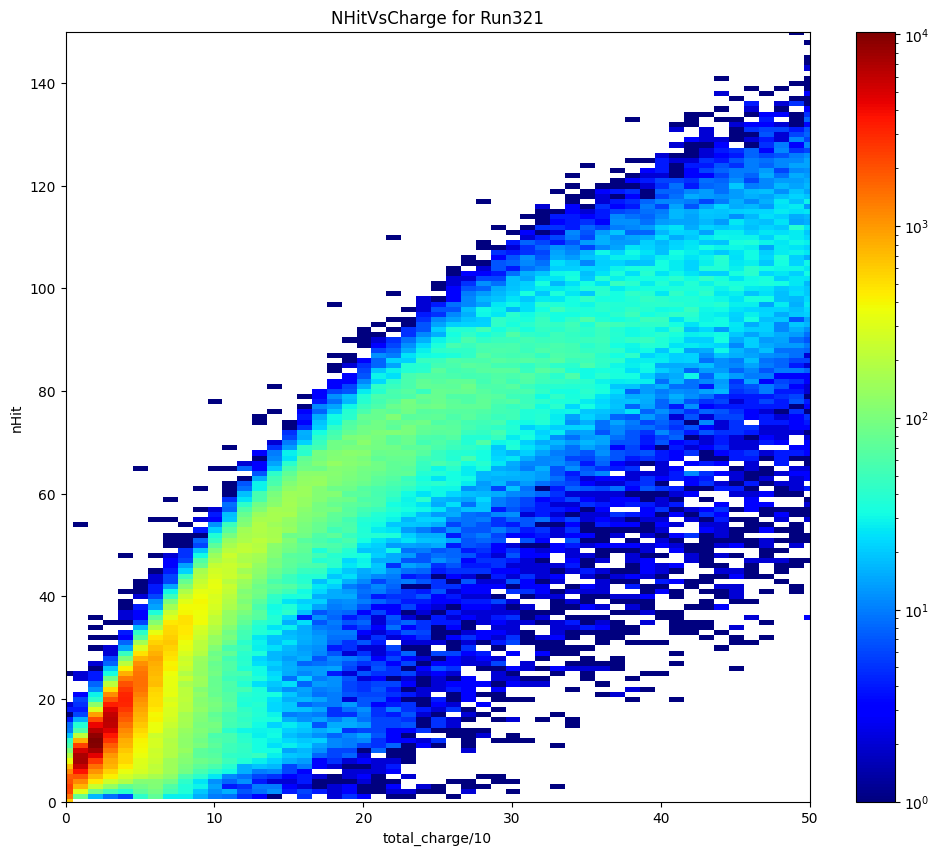

In [7]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "321"

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
total_charge = rdf.AsNumpy(columns=["total_charge"])["total_charge"]

TotalChargeVsNHit = np.zeros([225,1000],int)
for iEvt in range(0,len(nhit)):
    if(int(total_charge[iEvt]/10) < 1000):
        TotalChargeVsNHit[nhit[iEvt]][int(total_charge[iEvt]/10)] +=1
    else:
        TotalChargeVsNHit[nhit[iEvt]][999] +=1

plt.figure(figsize=(12,10))
plt.imshow(TotalChargeVsNHit,origin='lower',cmap='jet',norm=colors.LogNorm(), aspect="auto")
plt.title("NHitVsCharge for Run"+run_number)
plt.xlabel("total_charge/10")
plt.ylabel("nHit")
plt.xlim(0,50)
plt.ylim(0,150)
plt.colorbar()
plt.show()

### Correlating gamma and neutron events.
Let's see if we can see a gamma then a neutron on the next event using nhit.

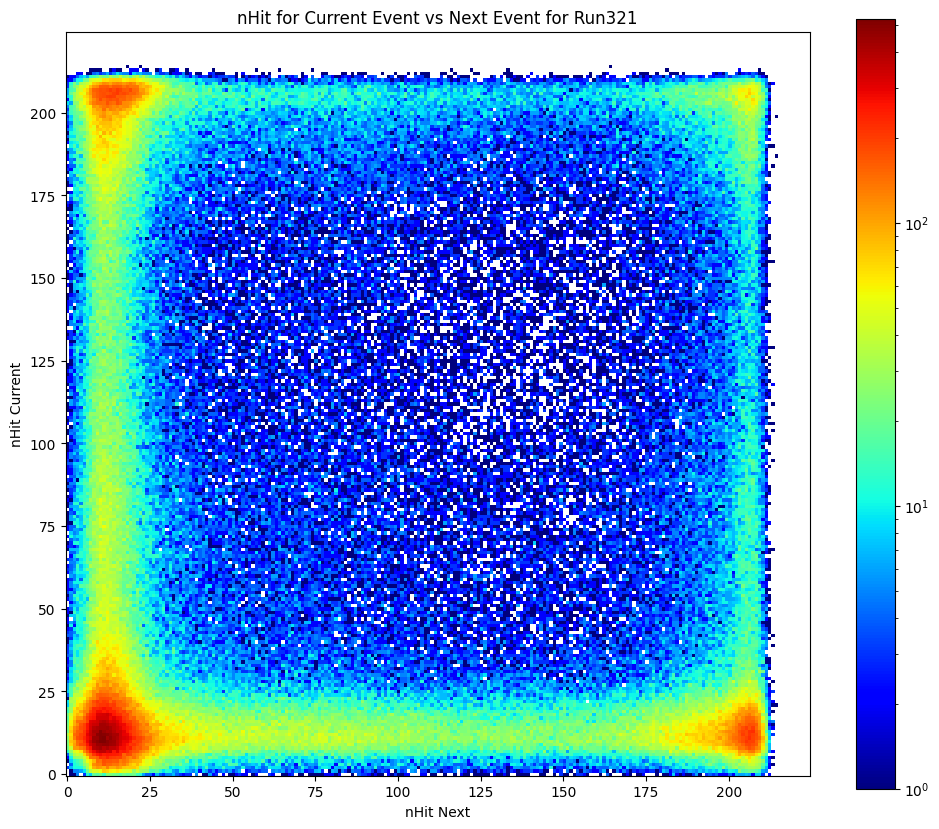

In [15]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "321"

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]

NHits_CurrentNext = np.zeros([225,225],int)

for iEvt in range(0,len(nhit)-1):
    if(nhit[iEvt] < 225 and nhit[iEvt+1]<225):
        NHits_CurrentNext[nhit[iEvt],nhit[iEvt+1]]+=1

plt.figure(figsize=(12,10))
plt.imshow(NHits_CurrentNext,origin='lower',cmap='jet',norm=colors.LogNorm())
plt.title("nHit for Current Event vs Next Event for Run"+run_number)
plt.xlabel("nHit Next")
plt.ylabel("nHit Current")
plt.colorbar()
plt.show()

There are  492084  events


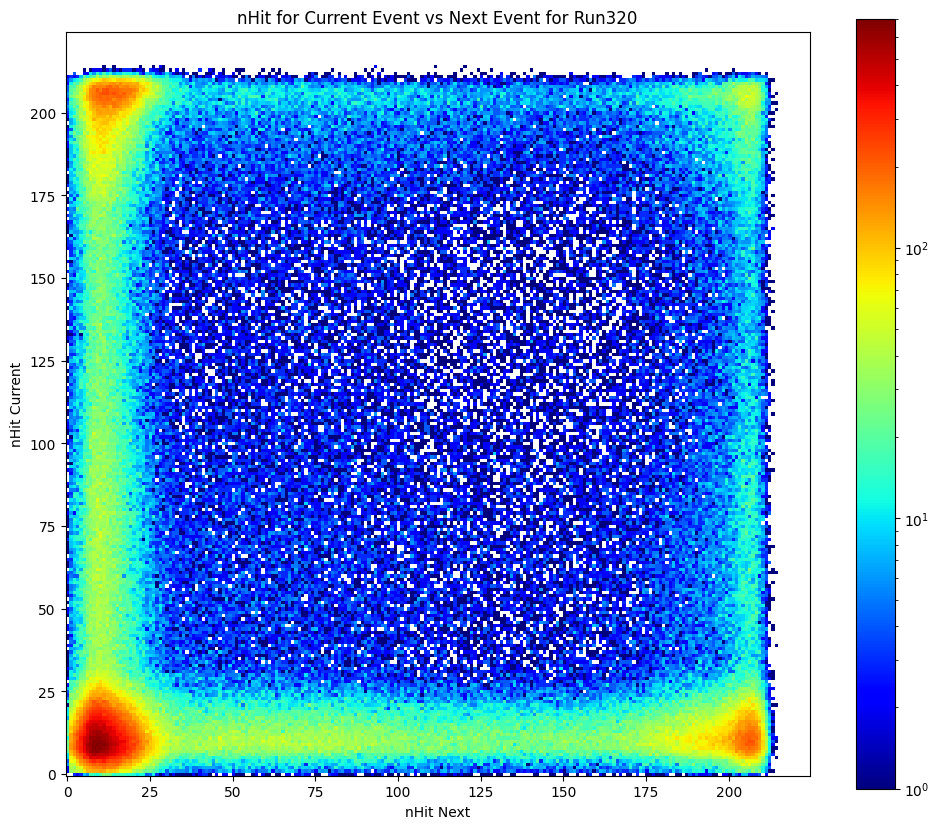

Warning in <TFile::Init>: file /mnt/data/eos/run320/run320.root probably not closed, trying to recover
Info in <TFile::Recover>: /mnt/data/eos/run320/run320.root, recovered key TTree:events at address 1063234662
Warning in <TFile::Init>: successfully recovered 1 keys
Warning in <TFile::Init>: file /mnt/data/eos/run320/run320.root probably not closed, trying to recover
Info in <TFile::Recover>: /mnt/data/eos/run320/run320.root, recovered key TTree:events at address 1063234662
Warning in <TFile::Init>: successfully recovered 1 keys


In [16]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "320"

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
NHits_CurrentNext = np.zeros([225,225],int)

print("There are ",len(nhit)," events")
for iEvt in range(0,len(nhit)-1):
    if(nhit[iEvt] < 225 and nhit[iEvt+1]<225):
        NHits_CurrentNext[nhit[iEvt],nhit[iEvt+1]]+=1

plt.figure(figsize=(12,10))
plt.imshow(NHits_CurrentNext,origin='lower',cmap='jet',norm=colors.LogNorm())
plt.title("nHit for Current Event vs Next Event for Run"+run_number)
plt.xlabel("nHit Next")
plt.ylabel("nHit Current")
plt.colorbar()
plt.show()

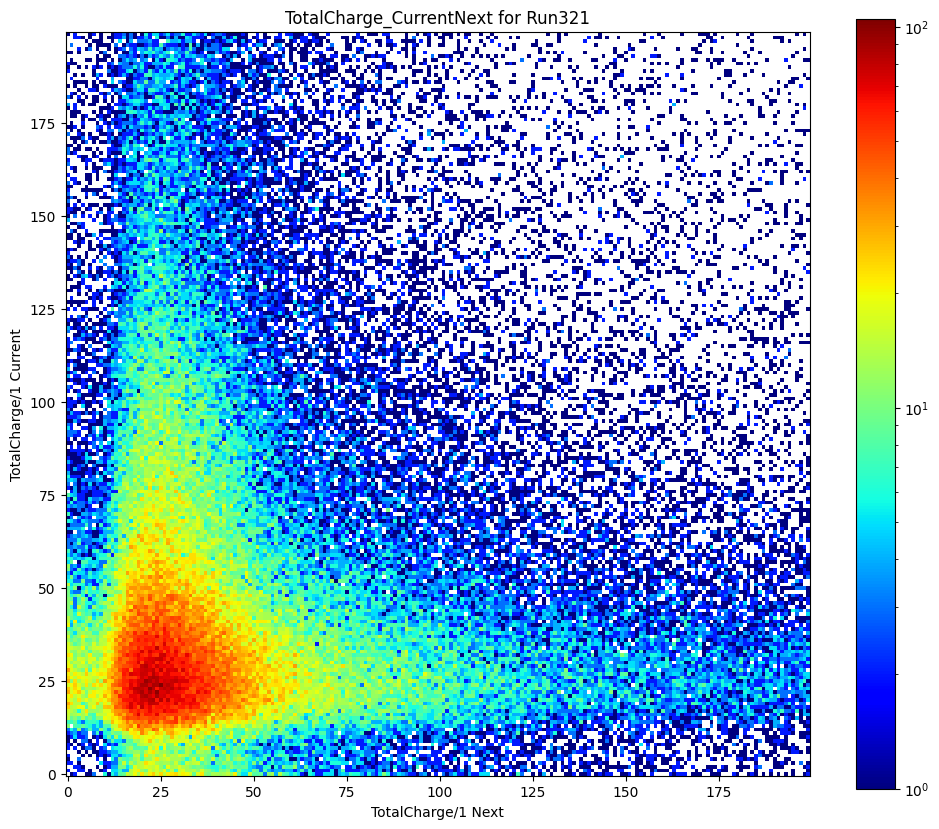

In [18]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "321"

chargescale=1

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
total_charge = rdf.AsNumpy(columns=["total_charge"])["total_charge"]
TotalCharge_CurrentNext = np.zeros([200,200],int)

for iEvt in range(0,len(total_charge)-1):
    if(total_charge[iEvt]/chargescale<200 and total_charge[iEvt+1]/chargescale<200 
       and total_charge[iEvt]/chargescale>=0 and total_charge[iEvt+1]/chargescale>=0 ):
        TotalCharge_CurrentNext[int(total_charge[iEvt]/chargescale),int(total_charge[iEvt+1]/chargescale)]+=1
    else:
        TotalCharge_CurrentNext[199,199]+=0#1

plt.figure(figsize=(12,10))
plt.imshow(TotalCharge_CurrentNext,origin='lower',cmap='jet',norm=colors.LogNorm())
plt.title("TotalCharge_CurrentNext for Run"+run_number)
plt.xlabel("TotalCharge/"+str(chargescale)+" Next")
plt.ylabel("TotalCharge/"+str(chargescale)+" Current")
#plt.xlim(0,100)
#plt.ylim(0,100)
plt.colorbar()
plt.show()

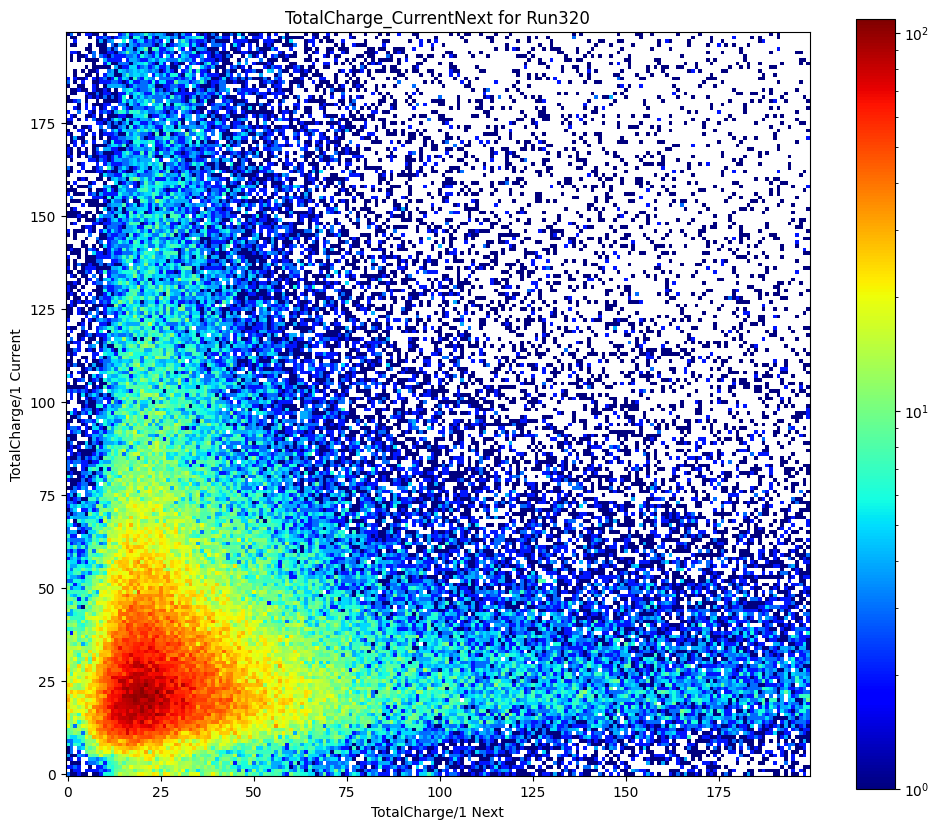

Warning in <TFile::Init>: file /mnt/data/eos/run320/run320.root probably not closed, trying to recover
Info in <TFile::Recover>: /mnt/data/eos/run320/run320.root, recovered key TTree:events at address 1063234662
Warning in <TFile::Init>: successfully recovered 1 keys
Warning in <TFile::Init>: file /mnt/data/eos/run320/run320.root probably not closed, trying to recover
Info in <TFile::Recover>: /mnt/data/eos/run320/run320.root, recovered key TTree:events at address 1063234662
Warning in <TFile::Init>: successfully recovered 1 keys


In [17]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "320"

chargescale=1

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
total_charge = rdf.AsNumpy(columns=["total_charge"])["total_charge"]
TotalCharge_CurrentNext = np.zeros([200,200],int)

for iEvt in range(0,len(total_charge)-1):
    if(total_charge[iEvt]/chargescale<200 and total_charge[iEvt+1]/chargescale<200 
       and total_charge[iEvt]/chargescale>=0 and total_charge[iEvt+1]/chargescale>=0 ):
        TotalCharge_CurrentNext[int(total_charge[iEvt]/chargescale),int(total_charge[iEvt+1]/chargescale)]+=1
    else:
        TotalCharge_CurrentNext[199,199]+=0#1

plt.figure(figsize=(12,10))
plt.imshow(TotalCharge_CurrentNext,origin='lower',cmap='jet',norm=colors.LogNorm())
plt.title("TotalCharge_CurrentNext for Run"+run_number)
plt.xlabel("TotalCharge/"+str(chargescale)+" Next")
plt.ylabel("TotalCharge/"+str(chargescale)+" Current")
#plt.xlim(0,100)
#plt.ylim(0,100)
plt.colorbar()
plt.show()

/tmp/ipykernel_2462899/4052587630.py:32: RuntimeWarning: divide by zero encountered in log10
  ax.plot_surface(X, Y, np.log10(TotalCharge_CurrentNext))


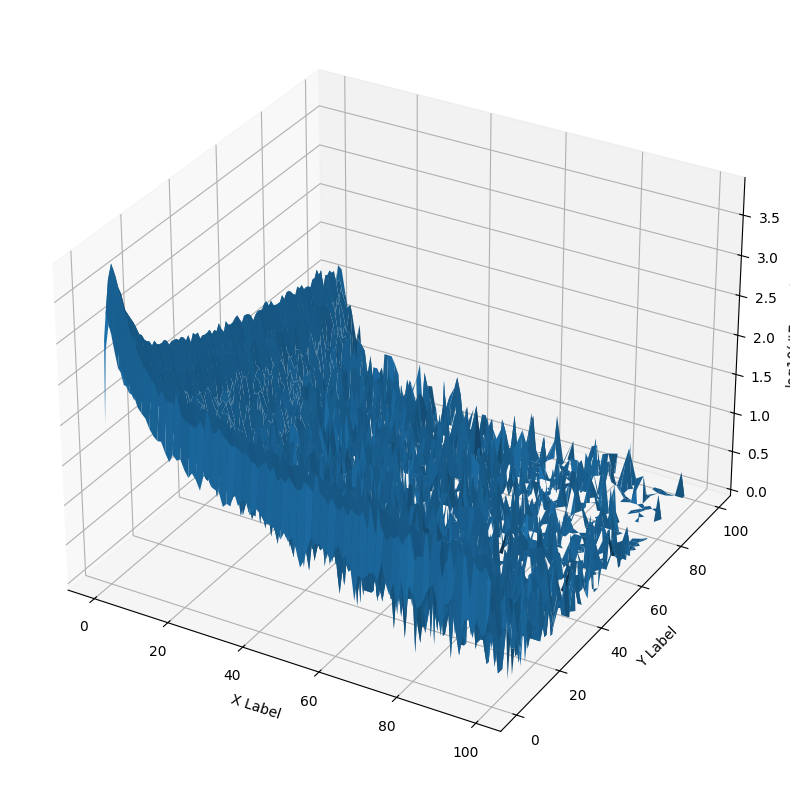

In [11]:
#%matplotlib ipympl
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "321"

chargescale=10

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
total_charge = rdf.AsNumpy(columns=["total_charge"])["total_charge"]
TotalCharge_CurrentNext = np.zeros([100,100],int)

for iEvt in range(0,len(total_charge)-1):
    if(total_charge[iEvt]/chargescale<100 and total_charge[iEvt+1]/chargescale<100 
       and total_charge[iEvt]/chargescale>=0 and total_charge[iEvt+1]/chargescale>=0 ):
        TotalCharge_CurrentNext[int(total_charge[iEvt]/chargescale),int(total_charge[iEvt+1]/chargescale)]+=1
    else:
        TotalCharge_CurrentNext[99,99]+=0#1


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.figure.set_size_inches(10, 10)
X, Y = np.meshgrid(range(0,100), range(0,100))
#zs = np.array(fun(np.ravel(X), np.ravel(Y)))
#Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, np.log10(TotalCharge_CurrentNext))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('log10(#Events)')
plt.show()


There are  499539  event in run  321
There are  492084  event in run  320


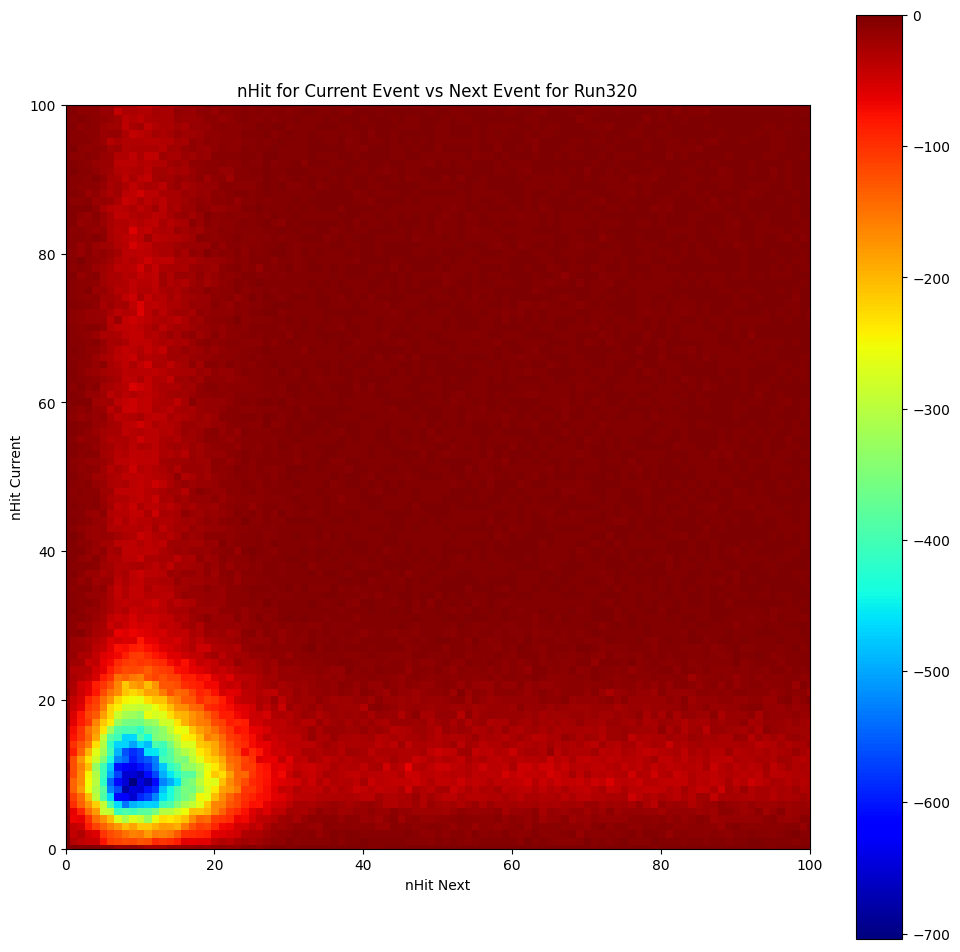

Warning in <TFile::Init>: file /mnt/data/eos/run320/run320.root probably not closed, trying to recover
Info in <TFile::Recover>: /mnt/data/eos/run320/run320.root, recovered key TTree:events at address 1063234662
Warning in <TFile::Init>: successfully recovered 1 keys
Warning in <TFile::Init>: file /mnt/data/eos/run320/run320.root probably not closed, trying to recover
Info in <TFile::Recover>: /mnt/data/eos/run320/run320.root, recovered key TTree:events at address 1063234662
Warning in <TFile::Init>: successfully recovered 1 keys


In [12]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "321"

rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
NHits_CurrentNext = np.zeros([225,225],int)

print("There are ",len(nhit)," event in run ", run_number)
for iEvt in range(0,492084): #len(nhit)-1):
    if(nhit[iEvt] < 225 and nhit[iEvt+1]<225):
        NHits_CurrentNext[nhit[iEvt],nhit[iEvt+1]]+=1


run_number = "320"
rdf = ROOT.RDataFrame("events","/mnt/data/eos/run"+run_number+"/run"+run_number+".root")
nhit = rdf.AsNumpy(columns=["nhit"])["nhit"]
NHits_CurrentNext = np.zeros([225,225],int)

print("There are ",len(nhit)," event in run ", run_number)
for iEvt in range(0,len(nhit)-1):
    if(nhit[iEvt] < 225 and nhit[iEvt+1]<225):
        NHits_CurrentNext[nhit[iEvt],nhit[iEvt+1]]-=1

plt.figure(figsize=(12,12))
plt.imshow(NHits_CurrentNext,origin='lower',cmap='jet')#,norm=colors.LogNorm())
plt.title("nHit for Current Event vs Next Event for Run"+run_number)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel("nHit Next")
plt.ylabel("nHit Current")
plt.colorbar()
plt.show()

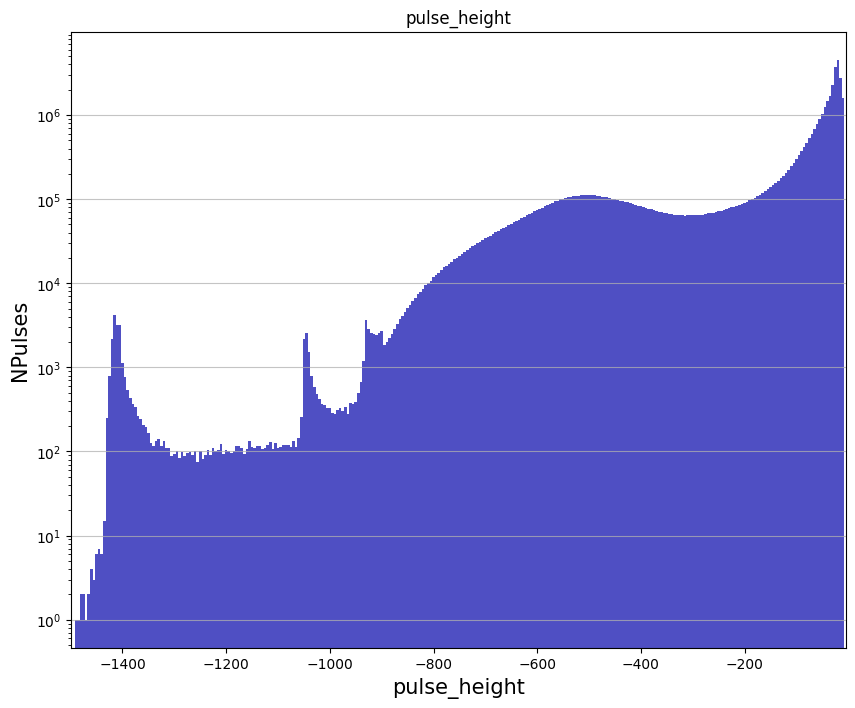

In [13]:
pulse_height_list = []
for iEvt in range(0,len(event_number)):
    for iPulse in range(0,len(pulse_height[iEvt])):
        pulse_height_list.append(pulse_height[iEvt][iPulse])
# Create histogram using numpy
hist, bin_edges = np.histogram(pulse_height_list, bins=np.arange(-1500,0,5))

# Plot histogram using matplotlib
plt.figure(figsize=[10,8])
plt.bar(bin_edges[:-1], hist, width = 5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.title("pulse_height")
plt.xlabel('pulse_height',fontsize=15)
plt.ylabel('NPulses',fontsize=15)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
plt.yscale("log")
plt.show()
